In [1]:
def ln_return(price):
    price['PX_LAST+1']= pd.Series(price.PX_LAST.shift(+1))
    price_ln= np.log(price.PX_LAST) - np.log(price["PX_LAST+1"])
    price['ln_ret'] = pd.Series(price_ln)
    price.drop(price.head(1).index,inplace=True)   
    return

In [2]:
def ols(stock, market):
    global params
    global mse
    reg=pd.concat([stock["ln_ret"],market["ln_ret"]], axis=1)
    reg.columns = ['Tencent', 'HSI']
    print(reg)
    results =smf.ols("Tencent ~ HSI",data=reg).fit()
    print (results.summary())
    params=results.params
    print(results.params)
    mse =results.mse_resid
    return

In [3]:
import pandas as pd 
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

#813
#NetEase Adjusted Share Price in Estimation Window of 813
est_813_ne= pd.read_excel('est-win-813-NE.xlsx',index_col=0)
ln_return(est_813_ne)
print(est_813_ne)

#NASDAQ 
est_813_nas = pd.read_excel('est-win-813-NASDAQ.xlsx',index_col=0)
ln_return(est_813_nas)
print(est_813_nas)

#regression 813
ols(est_813_ne,est_813_nas)
const_813, ln_ret_813= round(params,6)
r_mse = mse**.5

print ("MSE Root=%s" %(r_mse))
print ("Return of NetEase = %s + %s(Return of NASDAQ)" %(const_813,ln_ret_813))


            PX_LAST  PX_LAST+1    ln_ret
Date                                    
2018-03-14   314.17     311.62  0.008150
2018-03-15   325.58     314.17  0.035674
2018-03-16   326.94     325.58  0.004168
2018-03-19   317.95     326.94 -0.027883
2018-03-20   314.61     317.95 -0.010560
2018-03-21   319.77     314.61  0.016268
2018-03-22   302.51     319.77 -0.055488
2018-03-23   295.66     302.51 -0.022904
2018-03-26   297.38     295.66  0.005801
2018-03-27   280.76     297.38 -0.057511
2018-03-28   274.54     280.76 -0.022403
2018-03-29   280.39     274.54  0.021085
2018-04-02   275.86     280.39 -0.016288
2018-04-03   271.22     275.86 -0.016963
2018-04-04   276.96     271.22  0.020943
2018-04-05   278.07     276.96  0.004000
2018-04-06   272.74     278.07 -0.019354
2018-04-09   280.51     272.74  0.028090
2018-04-10   282.49     280.51  0.007034
2018-04-11   281.74     282.49 -0.002658
2018-04-12   275.81     281.74 -0.021272
2018-04-13   272.99     275.81 -0.010277
2018-04-16   272

In [4]:
def abret(ret,act):
    ret = pd.Series(ret["ln_ret"])
    er = const_813 + ln_ret_813 * ret
    act['ER'] = pd.Series(er)
    act["AR"]= act.ln_ret-act.ER
    act['AR Beta'] = (act["AR"]/r_mse)
    act["CAR"]= act["AR"].cumsum()
    act["CAR Beta"]= (act["CAR"]/ ((len(act)**.5)*r_mse))
    act = act.drop(act.columns[[0, 1]], axis=1)
    print (act)
    act.to_excel("output.xlsx")
    return

In [5]:
#Actual return on 813
act_813_ne= pd.read_excel('act-win-813-NE.xlsx',index_col=0)
ln_return(act_813_ne)
print(act_813_ne)

#Actual NASDAQ return on 813
act_813_NAS= pd.read_excel('act-win-813-NASDAQ.xlsx',index_col=0)
ln_return(act_813_NAS)
print(act_813_NAS)

#Abnormal Return 813
abret(act_813_NAS,act_813_ne)


            PX_LAST  PX_LAST+1    ln_ret
Date                                    
2018-08-13   215.79     224.67 -0.040327
2018-08-14   208.21     215.79 -0.035759
2018-08-15   200.65     208.21 -0.036985
2018-08-16   200.25     200.65 -0.001996
             PX_LAST  PX_LAST+1    ln_ret
Date                                     
2018-08-13  7819.706   7839.110 -0.002478
2018-08-14  7870.895   7819.706  0.006525
2018-08-15  7774.118   7870.895 -0.012372
2018-08-16  7806.524   7774.118  0.004160
              ln_ret        ER        AR   AR Beta       CAR  CAR Beta
Date                                                                  
2018-08-13 -0.040327 -0.004961 -0.035366 -1.898635 -0.035366 -0.949317
2018-08-14 -0.035759  0.004531 -0.040290 -2.162972 -0.075656 -2.030803
2018-08-15 -0.036985 -0.015392 -0.021593 -1.159243 -0.097249 -2.610425
2018-08-16 -0.001996  0.002038 -0.004033 -0.216527 -0.101282 -2.718688


In [6]:
#Actual return on 831
act_831_ne= pd.read_excel('act-win-831-NE.xlsx',index_col=0)
ln_return(act_831_ne)
print(act_831_ne)

#Actual NASDAQ return on 831
act_831_NAS= pd.read_excel('act-win-831-NASDAQ.xlsx',index_col=0)
ln_return(act_831_NAS)
print(act_831_NAS)

#Abnormal Return 831
abret(act_831_NAS, act_831_ne)


            PX_LAST  PX_LAST+1    ln_ret
Date                                    
2018-08-31   197.71     194.39  0.016935
2018-09-04   197.27     197.71 -0.002228
2018-09-05   189.75     197.27 -0.038866
2018-09-06   191.19     189.75  0.007560
             PX_LAST  PX_LAST+1    ln_ret
Date                                     
2018-08-31  8109.537   8088.360  0.002615
2018-09-04  8091.246   8109.537 -0.002258
2018-09-05  7995.172   8091.246 -0.011945
2018-09-06  7922.726   7995.172 -0.009103
              ln_ret        ER        AR   AR Beta       CAR  CAR Beta
Date                                                                  
2018-08-31  0.016935  0.000409  0.016526  0.887206  0.016526  0.443603
2018-09-04 -0.002228 -0.004729  0.002501  0.134253  0.019027  0.510730
2018-09-05 -0.038866 -0.014942 -0.023924 -1.284379 -0.004897 -0.131460
2018-09-06  0.007560 -0.011945  0.019505  1.047147  0.014608  0.392114


In [7]:
#Actual return on 96
act_96_ne= pd.read_excel('act-win-96-NE.xlsx',index_col=0)
ln_return(act_96_ne)
print(act_96_ne)

#Actual NASDAQ return on 831
act_96_NAS= pd.read_excel('act-win-96-NASDAQ.xlsx',index_col=0)
ln_return(act_96_NAS)
print(act_96_NAS)

#Abnormal Return 831
abret(act_96_NAS, act_96_ne)


            PX_LAST  PX_LAST+1    ln_ret
Date                                    
2018-09-07   193.35     191.19  0.011234
2018-09-10   188.39     193.35 -0.025988
2018-09-11   188.79     188.39  0.002121
2018-09-12   191.59     188.79  0.014722
             PX_LAST  PX_LAST+1    ln_ret
Date                                     
2018-09-07  7902.542   7922.726 -0.002551
2018-09-10  7924.160   7902.542  0.002732
2018-09-11  7972.474   7924.160  0.006079
2018-09-12  7954.229   7972.474 -0.002291
              ln_ret        ER        AR   AR Beta       CAR  CAR Beta
Date                                                                  
2018-09-07  0.011234 -0.005037  0.016272  0.873554  0.016272  0.436777
2018-09-10 -0.025988  0.000532 -0.026520 -1.423734 -0.010248 -0.275090
2018-09-11  0.002121  0.004061 -0.001940 -0.104135 -0.012188 -0.327157
2018-09-12  0.014722 -0.004764  0.019486  1.046111  0.007298  0.195898


In [8]:
#calculate AAR
aar = []
for ar in act_813_ne['AR'],act_831_ne['AR'],act_96_ne['AR']:
    ar = ar.reset_index()
    ar = ar['AR']
    aar.append(ar/3)
aar = pd.concat(aar, axis=1)
aar= aar.sum(axis=1)
print (aar)

0   -0.000856
1   -0.021436
2   -0.015819
3    0.011653
dtype: float64


In [9]:
#calculate CAAR
caar = []
for car in act_813_ne['CAR'],act_831_ne['CAR'],act_96_ne['CAR']:
    car = car.reset_index()
    car = car['CAR']
    caar.append(car/3)
caar = pd.concat(caar, axis=1)
caar= caar.sum(axis=1)
print (caar)

0   -0.000856
1   -0.022292
2   -0.038111
3   -0.026459
dtype: float64


In [10]:
aar_var= (r_mse*3)/(3**2)
taar = aar/aar_var
print (aar_var)
print (taar)

0.0062090171969490056
0   -0.137874
1   -3.452453
2   -2.547757
3    1.876731
dtype: float64


In [11]:
caar_var = ((4**.5)*(r_mse*3))/(3**2)
tcaar = caar/caar_var
print (tcaar)

0   -0.068937
1   -1.795164
2   -3.069042
3   -2.130676
dtype: float64


In [12]:
avg=pd.concat([aar, taar, caar,tcaar], axis=1)
avg.columns= ['AAR','AAR Beta', 'CAAR', 'CAAR Beta']
print (avg)

        AAR  AAR Beta      CAAR  CAAR Beta
0 -0.000856 -0.137874 -0.000856  -0.068937
1 -0.021436 -3.452453 -0.022292  -1.795164
2 -0.015819 -2.547757 -0.038111  -3.069042
3  0.011653  1.876731 -0.026459  -2.130676


In [13]:
#Testing AR

#813 test
tar_813 = act_813_ne["AR"][0] / r_mse
print ("T-stat for 813 is %s" %tar_813)

#831 test
tar_831 = act_831_ne["AR"][0] / r_mse
print ("T-stat for 831 is %s" %tar_831)

#96 test
tar_96 = act_96_ne["AR"][0] / r_mse
print ("T-stat for 96 is %s" %tar_96)

T-stat for 813 is -1.8986349082131024
T-stat for 831 is 0.8872062765303533
T-stat for 96 is 0.8735544554939007


In [14]:
car = lambda act, mse: act["CAR"][-1]/ ((len(act)**.5)*mse)

In [15]:
#Test CAR
t813 = car(act_813_ne,r_mse)
print(t813)

t831=car(act_831_ne,r_mse)
print (t831)

t96=car(act_96_ne,r_mse)
print (t96)

-2.7186880460518754
0.3921135096606121
0.1958981086551297


In [16]:
#tTest AAR
var= (r_mse*3)/(3**2)
taar = aar[0]/ var
print (taar)

-0.13787417618884826


In [17]:
#Test CAAR
#CAAR variance:
caar_var = ((4**.5)*(r_mse*3))/(3**2)
tcaar = caar[3]/caar_var
print (caar_var)
print (tcaar)

0.012418034393898011
-2.130676427736133


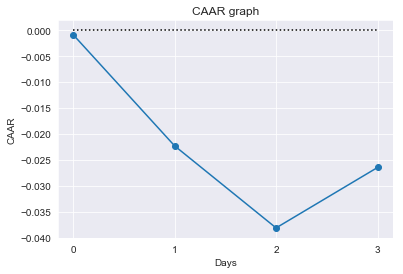

In [54]:
#caar curve
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.plot(range(4),caar,"-o")
plt.hlines(0,0,3,linestyles='dotted')
plt.xticks(np.arange(0, 4, step=1))
plt.title('CAAR graph')
plt.xlabel('Days')
plt.ylabel('CAAR')
plt.savefig('foo.png')
plt.show()


In [19]:
ne_car_3 = [0.01627,-0.01025,-0.01219,0.0073]
ne_car_2 = [0.01653,0.01903,-0.0049,0.01461]
ne_car_1 = [-0.03537,-0.07566,-0.09725,-0.10128]

In [21]:
ba_car_1 = [-0.00233,-0.04146,-0.04214,-0.04552]
ba_car_2 = [0.00534,-0.01494,-0.05194,-0.07496]
ba_car_3 = [0.01917,-0.02095,-0.01715,0.00285]

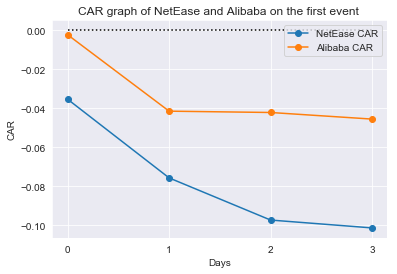

In [81]:
plt.plot(range(4),ne_car_1,"-o", label="NetEase CAR" )
plt.plot(range(4),ba_car_1,"-o", label="Alibaba CAR")
plt.hlines(0,0,3,linestyles='dotted')
plt.title('CAR graph of NetEase and Alibaba on the first event ')
plt.xticks(np.arange(0, 4, step=1))
plt.legend(bbox_to_anchor=(1.05, 1))
plt.legend(loc='upper right')
plt.xlabel('Days')
plt.ylabel('CAR')
plt.savefig('foo.png')
plt.show()

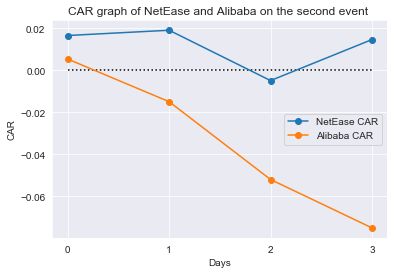

In [83]:
plt.plot(range(4),ne_car_2,"-o", label="NetEase CAR" )
plt.plot(range(4),ba_car_2,"-o", label="Alibaba CAR")
plt.hlines(0,0,3,linestyles='dotted')
plt.title('CAR graph of NetEase and Alibaba on the second event ')
plt.xticks(np.arange(0, 4, step=1))
plt.xlabel('Days')
plt.ylabel('CAR')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc='center right')
plt.savefig('foo.png')
plt.show()

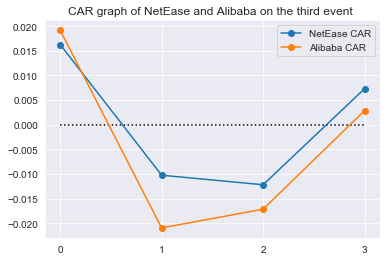

In [84]:
plt.plot(range(4),ne_car_3,"-o", label="NetEase CAR" )
plt.plot(range(4),ba_car_3,"-o", label="Alibaba CAR")
plt.hlines(0,0,3,linestyles='dotted')
plt.title('CAR graph of NetEase and Alibaba on the third event ')
plt.xticks(np.arange(0, 4, step=1))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc='upper right')
plt.savefig('foo.png')
plt.show()